In [1]:
import nltk
#nltk.download_shell()
messages=[line.rstrip() for line in open('C:/Users/Home/Desktop/Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Natural-Language-Processing/smsspamcollection/SMSSpamCollection')]
messages[0]
len(messages)

5574

In [2]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [3]:
import pandas as pd
messages=pd.read_csv('C:/Users/Home/Desktop/Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Natural-Language-Processing/smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])
messages.head()
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
messages['length']=messages['message'].apply(len)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

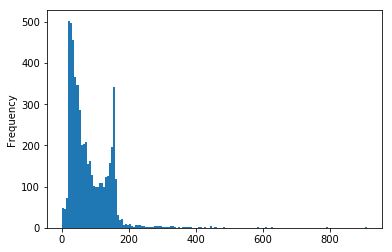

In [8]:
messages['length'].plot.hist(bins=150)

In [9]:
messages[messages['length']>900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C4C1940>,
      dtype=object)

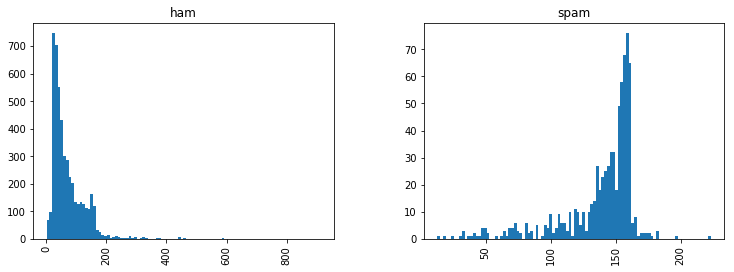

In [11]:
messages.hist(column='length',by='label',bins=100,figsize=(12,4))

In [12]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
import string

def text_process(mess):
    '''
    Inputs a string of text and performs following activities:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Clean the text and return
    '''
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [16]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

print(len(bow_transformer.vocabulary_))


11425


In [18]:
message4=messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [21]:
bow4=bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

bow_transformer.get_feature_names()[4068]
bow_transformer.get_feature_names()[9554]

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


'say'

In [23]:
messages_bow=bow_transformer.transform(messages['message'])

In [24]:
print('Shape of sparse matrix:',messages_bow.shape)

Shape of sparse matrix: (5572, 11425)


In [25]:
print('Amount of non zero entries:',messages_bow.nnz)

Amount of non zero entries: 50548


In [27]:
#Amount of non zero messages by total messages
sparsity=(100*messages_bow.nnz)/(messages_bow.shape[0]*messages_bow.shape[1])
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [32]:
tfidf4=tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [33]:
print(tfidf4.shape)

(1, 11425)


In [34]:
#Inverse document frequency of any word say 'university'
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [35]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [36]:
#Now we need to train the model using Naive Bayes classification
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [38]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [39]:
prediction=spam_detect_model.predict(messages_tfidf)
prediction

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [45]:
from sklearn.cross_validation import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)


In [49]:
label_train


1096     ham
4241     ham
4800     ham
4962     ham
2376     ham
256      ham
786      ham
1690     ham
324      ham
3953     ham
1539     ham
5546     ham
2626    spam
3152     ham
3288     ham
4866     ham
1704     ham
4077    spam
1387     ham
522      ham
5248     ham
3761     ham
3200     ham
1020     ham
4650     ham
1674    spam
4961     ham
5519     ham
213      ham
5216     ham
        ... 
4986     ham
3028     ham
4632     ham
2817     ham
222      ham
3301     ham
225     spam
4382     ham
2510     ham
3025     ham
342      ham
4999     ham
2473    spam
1506     ham
5029     ham
727      ham
1434     ham
4439     ham
3594     ham
4608     ham
1298     ham
564     spam
4416     ham
2768     ham
5555     ham
666      ham
3863     ham
2997     ham
3570     ham
1983     ham
Name: label, Length: 3900, dtype: object

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline1=Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
        ])
pipeline2=Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier',RandomForestClassifier())
        ])
      

In [55]:
pipeline1.fit(msg_train,label_train)
pipeline2.fit(msg_train,label_train)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000C8AD0D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [56]:
predictions1=pipeline1.predict(msg_test)
predictions2=pipeline2.predict(msg_test)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(label_test,predictions1))
print(confusion_matrix(label_test,predictions1))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1460
       spam       0.99      0.71      0.83       212

avg / total       0.96      0.96      0.96      1672

[[1459    1]
 [  62  150]]


In [58]:
print(classification_report(label_test,predictions2))
print(confusion_matrix(label_test,predictions2))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1460
       spam       0.99      0.73      0.84       212

avg / total       0.97      0.97      0.96      1672

[[1459    1]
 [  57  155]]
